In [173]:
# Just another day in the life of a data analyst...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# What are the typical libraries we import?
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
fifa21_male2 = pd.read_csv('fifa21_male2.csv')
fifa21_male2

C:\Users\RaulR\AppData\Local\Temp\ipykernel_56772\2905495550.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa21_male2 = pd.read_csv('fifa21_male2.csv')


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [9]:
px.box(fifa21_male2['Age'])

In [ ]:
px.scatter()

In [3]:
fifa21_male2.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [4]:
fifa21_male2_numeric = fifa21_male2.select_dtypes(include=['int64', 'float64']) 
fifa21_male2_numeric.head()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,2,33,69,71,69,0,313,75,50,59,...,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,...,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,...,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,...,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,...,13,7,2014,420,58,70,85,85,63,59


In [5]:
fifa21_male2_numeric.columns

Index(['ID', 'Age', 'OVA', 'BOV', 'POT', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [192]:
df_age_total_base = pd.DataFrame([fifa21_male2_numeric['Age']]+[fifa21_male2_numeric['Total Stats']]+ [fifa21_male2_numeric['Base Stats']] +[fifa21_male2_numeric['OVA']] + [fifa21_male2_numeric['POT']] + [fifa21_male2_numeric['BOV']] )
df_age_total_base.T

,Age,Total Stats,Base Stats,OVA,POT,BOV
0,33,1929,408,69,69,71
1,37,1906,385,71,71,70
2,33,1770,354,71,71,71
3,36,1348,369,68,82,70
4,36,2014,420,81,81,82
...,...,...,...,...,...,...
17120,22,1367,302,64,69,66
17121,18,1529,319,56,66,58
17122,18,1430,303,56,67,56
17123,20,1579,335,62,73,62


In [193]:
fifa21_male2_categorical = fifa21_male2.select_dtypes(include='object')
fifa21_male2_categorical.head()

,Name,Nationality,Club,BP,Position,Player Photo,Club Logo,Flag Photo,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [194]:
fifa21_male2_categorical.columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Player Photo',
       'Club Logo', 'Flag Photo', 'Team & Contract', 'Height', 'Weight',
       'foot', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender'],
      dtype='object')

In [195]:
fifa21_male2_categorical.drop(columns=['Joined', 'Loan Date End','Player Photo',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender','Club Logo','Flag Photo'],inplace=True)
fifa21_male2_categorical

,Name,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Value,Wage,Release Clause
0,G. Pasquale,Italy,Udinese,LWB,LM,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,€625K,€7K,€0
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,€600K,€7K,€1.1M
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,€1.1M,€15K,€0
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,Sunderland 2009,"5'11""",165lbs,Right,€0,€0,€0
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,€5.5M,€12K,€7.2M
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,€550K,€2K,€0
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,€130K,€3K,€273K
17122,C. Barrett,England,Burnley,RB,RB,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,€130K,€2K,€273K
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,€475K,€3K,€784K


In [196]:
df_Name_Value_Wage_Rea = pd.DataFrame([fifa21_male2_categorical['Name']] + [fifa21_male2_categorical['Value']] + [fifa21_male2_categorical['Wage']])
df_Name_Value_Wage_Rea.T

,Name,Value,Wage
0,G. Pasquale,€625K,€7K
1,Luis García,€600K,€7K
2,J. Cole,€1.1M,€15K
3,D. Yorke,€0,€0
4,Iniesta,€5.5M,€12K
...,...,...,...
17120,A. Medioub,€550K,€2K
17121,W. Rickard,€130K,€3K
17122,C. Barrett,€130K,€2K
17123,J. Gazibegović,€475K,€3K


In [197]:
New_Df_fifa = pd.concat([df_Name_Value_Wage_Rea,df_age_total_base])
New_Df_fifa1 = (New_Df_fifa.T)
New_Df_fifa1

,Name,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,G. Pasquale,€625K,€7K,33,1929,408,69,69,71
1,Luis García,€600K,€7K,37,1906,385,71,71,70
2,J. Cole,€1.1M,€15K,33,1770,354,71,71,71
3,D. Yorke,€0,€0,36,1348,369,68,82,70
4,Iniesta,€5.5M,€12K,36,2014,420,81,81,82
...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,€550K,€2K,22,1367,302,64,69,66
17121,W. Rickard,€130K,€3K,18,1529,319,56,66,58
17122,C. Barrett,€130K,€2K,18,1430,303,56,67,56
17123,J. Gazibegović,€475K,€3K,20,1579,335,62,73,62


In [198]:
New_Df_fifa1

,Name,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,G. Pasquale,€625K,€7K,33,1929,408,69,69,71
1,Luis García,€600K,€7K,37,1906,385,71,71,70
2,J. Cole,€1.1M,€15K,33,1770,354,71,71,71
3,D. Yorke,€0,€0,36,1348,369,68,82,70
4,Iniesta,€5.5M,€12K,36,2014,420,81,81,82
...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,€550K,€2K,22,1367,302,64,69,66
17121,W. Rickard,€130K,€3K,18,1529,319,56,66,58
17122,C. Barrett,€130K,€2K,18,1430,303,56,67,56
17123,J. Gazibegović,€475K,€3K,20,1579,335,62,73,62


In [199]:
New_Df_fifa1['Wage'].value_counts()

Wage
€2K      2453
€500     1746
€3K      1710
€1K      1293
€4K      1091
         ... 
€200K       2
€370K       1
€560K       1
€290K       1
€250        1
Name: count, Length: 142, dtype: int64

In [200]:
New_Df_fifa1['Wage'] = New_Df_fifa1['Wage'].str.replace('€','')
New_Df_fifa1['Wage'] = New_Df_fifa1['Wage'].str.replace('K','000')




In [201]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('€','')

In [202]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('K','000')

In [203]:
New_Df_fifa1.head()

,Name,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,G. Pasquale,625000,7000,33,1929,408,69,69,71
1,Luis García,600000,7000,37,1906,385,71,71,70
2,J. Cole,1.1M,15000,33,1770,354,71,71,71
3,D. Yorke,0,0,36,1348,369,68,82,70
4,Iniesta,5.5M,12000,36,2014,420,81,81,82


In [212]:
px.scatter(x=New_Df_fifa1['OVA'], y=New_Df_fifa1['Value'])

In [213]:
def change_point(value):
    if '.' in value:
        new_value = value.replace('M','00000')
    else:
        new_value = value.replace('M','000000')
    return new_value

In [214]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].apply(change_point)

In [215]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('.','')
New_Df_fifa1

,Name,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,G. Pasquale,625000,7000,33,1929,408,69,69,71
1,Luis García,600000,7000,37,1906,385,71,71,70
2,J. Cole,1100000,15000,33,1770,354,71,71,71
3,D. Yorke,0,0,36,1348,369,68,82,70
4,Iniesta,5500000,12000,36,2014,420,81,81,82
...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,550000,2000,22,1367,302,64,69,66
17121,W. Rickard,130000,3000,18,1529,319,56,66,58
17122,C. Barrett,130000,2000,18,1430,303,56,67,56
17123,J. Gazibegović,475000,3000,20,1579,335,62,73,62


In [217]:
New_Df_fifa1.dtypes

Name           object
Value          object
Wage           object
Age            object
Total Stats    object
Base Stats     object
OVA            object
POT            object
BOV            object
dtype: object

In [218]:
New_Df_fifa1['Value'] = pd.to_numeric(New_Df_fifa1['Value'])

In [219]:
New_Df_fifa1['Wage'] = pd.to_numeric(New_Df_fifa1['Wage'])

In [220]:
New_Df_fifa1['Age'] = pd.to_numeric(New_Df_fifa1['Age'])

In [221]:
New_Df_fifa1['Total Stats'] = pd.to_numeric(New_Df_fifa1['Total Stats'], errors='coerce')

In [222]:
New_Df_fifa1['Base Stats'] = pd.to_numeric(New_Df_fifa1['Base Stats'], errors='coerce')

In [223]:
New_Df_fifa1['OVA'] = pd.to_numeric(New_Df_fifa1['OVA'], errors='coerce')

In [224]:
New_Df_fifa1['BOV'] = pd.to_numeric(New_Df_fifa1['BOV'], errors='coerce')

In [225]:
New_Df_fifa1['POT'] = pd.to_numeric(New_Df_fifa1['POT'], errors='coerce')

In [226]:
New_Df_fifa1.dtypes

Name           object
Value           int64
Wage            int64
Age             int64
Total Stats     int64
Base Stats      int64
OVA             int64
POT             int64
BOV             int64
dtype: object

In [227]:
New_Df_fifa1_numeric = New_Df_fifa1.select_dtypes(include=['int64', 'float64']) 
New_Df_fifa1_numeric

,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,625000,7000,33,1929,408,69,69,71
1,600000,7000,37,1906,385,71,71,70
2,1100000,15000,33,1770,354,71,71,71
3,0,0,36,1348,369,68,82,70
4,5500000,12000,36,2014,420,81,81,82
...,...,...,...,...,...,...,...,...
17120,550000,2000,22,1367,302,64,69,66
17121,130000,3000,18,1529,319,56,66,58
17122,130000,2000,18,1430,303,56,67,56
17123,475000,3000,20,1579,335,62,73,62


In [243]:
New_Df_fifa1_numeric['Value'].value_counts()

Value
1100000     500
0           457
1000000     347
325000      342
450000      341
           ... 
52000000      1
72500000      1
67500000      1
46000000      1
5000          1
Name: count, Length: 216, dtype: int64

In [244]:
New_Df_fifa1_numeric_drop = New_Df_fifa1_numeric[New_Df_fifa1_numeric['Value']!= 0]
New_Df_fifa1_numeric_drop

,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,625000,7000,33,1929,408,69,69,71
1,600000,7000,37,1906,385,71,71,70
2,1100000,15000,33,1770,354,71,71,71
4,5500000,12000,36,2014,420,81,81,82
5,725000,5000,27,1649,360,66,70,66
...,...,...,...,...,...,...,...,...
17120,550000,2000,22,1367,302,64,69,66
17121,130000,3000,18,1529,319,56,66,58
17122,130000,2000,18,1430,303,56,67,56
17123,475000,3000,20,1579,335,62,73,62


In [228]:
num_corr = New_Df_fifa1_numeric.corr()
num_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
Value,1.00,0.82,0.10,0.39,0.53,0.63,0.56,0.64
Wage,0.82,1.00,0.20,0.38,0.48,0.59,0.46,0.59
Age,0.10,0.20,1.00,0.28,0.41,0.52,-0.24,0.46
Total Stats,0.39,0.38,0.28,1.00,0.68,0.61,0.33,0.64
Base Stats,0.53,0.48,0.41,0.68,1.00,0.83,0.47,0.83
OVA,0.63,0.59,0.52,0.61,0.83,1.00,0.59,0.99
POT,0.56,0.46,-0.24,0.33,0.47,0.59,1.00,0.63
BOV,0.64,0.59,0.46,0.64,0.83,0.99,0.63,1.00


<Axes: >

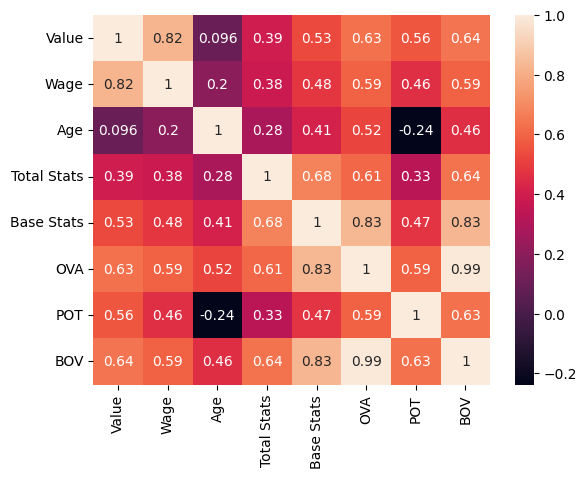

In [229]:
sns.heatmap(num_corr,annot=True)

In [245]:
px.scatter(x=New_Df_fifa1_numeric_drop['Value'], y=New_Df_fifa1_numeric_drop['OVA'])

In [233]:
condition = (New_Df_fifa1['Total Stats'] >= 1800) & (New_Df_fifa1['Value'] <= 5000000)
underrated_players = New_Df_fifa1[(New_Df_fifa1['Total Stats'] >= 1800) & (New_Df_fifa1['Value'] <= 5000000)]
underrated_players

,Name,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,G. Pasquale,625000,7000,33,1929,408,69,69,71
1,Luis García,600000,7000,37,1906,385,71,71,70
6,E. Belözoğlu,2800000,44000,38,2017,403,77,77,77
7,R. Giggs,1000,60000,39,1939,392,78,78,78
9,P. Scholes,400000,40000,37,2065,415,80,80,82
...,...,...,...,...,...,...,...,...,...
16876,B. Zaynutdinov,1400000,16000,22,1911,407,69,75,70
16900,Cedric Teguía,1300000,1000,18,1860,406,66,83,68
16928,Zarraga,875000,4000,21,1800,391,65,75,69
16948,D. Bureković,1000000,8000,25,1885,398,68,73,69


In [234]:
underrated_players.reset_index().drop(columns='index' ,inplace=True)

In [235]:
underrated_players

,Name,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
0,G. Pasquale,625000,7000,33,1929,408,69,69,71
1,Luis García,600000,7000,37,1906,385,71,71,70
6,E. Belözoğlu,2800000,44000,38,2017,403,77,77,77
7,R. Giggs,1000,60000,39,1939,392,78,78,78
9,P. Scholes,400000,40000,37,2065,415,80,80,82
...,...,...,...,...,...,...,...,...,...
16876,B. Zaynutdinov,1400000,16000,22,1911,407,69,75,70
16900,Cedric Teguía,1300000,1000,18,1860,406,66,83,68
16928,Zarraga,875000,4000,21,1800,391,65,75,69
16948,D. Bureković,1000000,8000,25,1885,398,68,73,69


In [236]:
underrated_players.sort_values(by='Age')

,Name,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
15004,J. Bellingham,2100000,3000,17,1817,400,69,88,72
14863,A. Vranckx,1300000,600,17,1804,388,66,86,68
13557,R. Gravenberch,4800000,4000,18,1875,403,71,87,74
16900,Cedric Teguía,1300000,1000,18,1860,406,66,83,68
15553,Rodrigo Fernandes,1200000,1000,18,1816,386,66,84,67
...,...,...,...,...,...,...,...,...,...
164,Zé Roberto,0,35000,40,2028,420,74,74,74
491,Y. Endo,0,4000,40,1848,364,68,68,68
157,C. Pizarro,0,19000,40,1802,358,74,74,74
665,Hilton,0,20000,42,1820,367,77,77,77


In [237]:
underrated_players.describe()

,Value,Wage,Age,Total Stats,Base Stats,OVA,POT,BOV
count,2.779000e+03,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000
mean,2.115458e+06,11810.165527,28.499460,1886.544800,397.788773,70.910399,72.748111,71.646635
std,1.400714e+06,12305.686455,4.256226,67.758101,14.827846,3.126830,3.901029,2.954965
min,0.000000e+00,0.000000,17.000000,1800.000000,355.000000,61.000000,61.000000,63.000000
25%,9.250000e+05,4000.000000,25.000000,1833.000000,387.500000,69.000000,70.000000,70.000000
50%,1.900000e+06,8000.000000,28.000000,1871.000000,396.000000,71.000000,73.000000,72.000000
75%,3.200000e+06,15000.000000,32.000000,1926.500000,407.000000,73.000000,75.000000,73.000000
max,5.000000e+06,100000.000000,43.000000,2207.000000,456.000000,83.000000,88.000000,82.000000


In [238]:
under_numeric = underrated_players.select_dtypes(include=['int64', 'float64'])
new_corr = under_numeric.corr()

<Axes: >

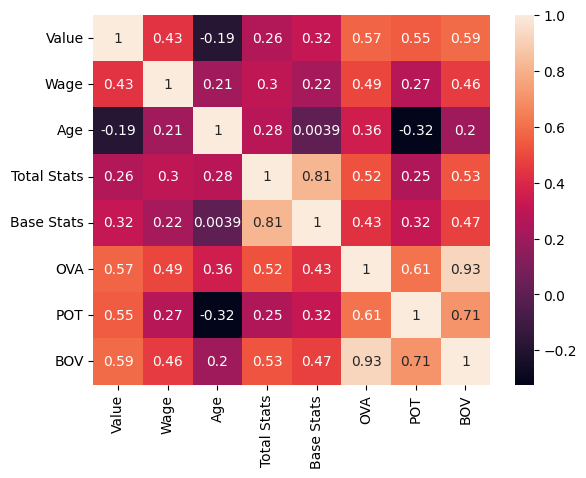

In [239]:
sns.heatmap(new_corr,annot=True)

In [241]:
Age_Value = underrated_players[['Age', 'Total Stats']]
Age_Value

,Age,Total Stats
0,33,1929
1,37,1906
6,38,2017
7,39,1939
9,37,2065
...,...,...
16876,22,1911
16900,18,1860
16928,21,1800
16948,25,1885


In [186]:
X = Age_Value.drop('Age',axis=1)
y = Age_Value['Age']

In [187]:
model = linear_model.LinearRegression()
result = model.fit(X,y)

In [188]:
result.score(X,y)

0.07874819273456912